## 4.3 Работа с датасетом "house price"
- Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
- Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('kc-house-data.csv',encoding='cp1251')

In [3]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
price,0.0,1.0,0.3,0.5,0.7,0.0,0.3,0.3,0.4,0.0,0.7,0.6,0.3,0.0,0.0,0.0,0.3,0.0,0.6,0.0
bedrooms,0.0,0.3,1.0,0.5,0.6,0.0,0.0,0.0,0.0,0.0,0.4,0.5,0.3,0.0,0.0,0.0,0.0,0.0,0.4,0.0
bathrooms,0.0,0.5,0.5,1.0,0.8,0.0,0.5,0.0,0.0,0.0,0.7,0.7,0.3,0.5,0.0,0.0,0.0,0.0,0.6,0.0
sqft_living,0.0,0.7,0.6,0.8,1.0,0.0,0.4,0.0,0.3,0.0,0.8,0.9,0.4,0.3,0.0,0.0,0.0,0.0,0.8,0.0
sqft_lot,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7
floors,0.0,0.3,0.0,0.5,0.4,0.0,1.0,0.0,0.0,-0.3,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.3,0.0
waterfront,0.0,0.3,0.0,0.0,0.0,0.0,0.0,1.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
view,0.0,0.4,0.0,0.0,0.3,0.0,0.0,0.4,1.0,0.0,0.3,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.3,0.0
condition,0.0,0.0,0.0,0.0,0.0,0.0,-0.3,0.0,0.0,1.0,0.0,0.0,0.0,-0.4,0.0,0.0,0.0,0.0,0.0,0.0


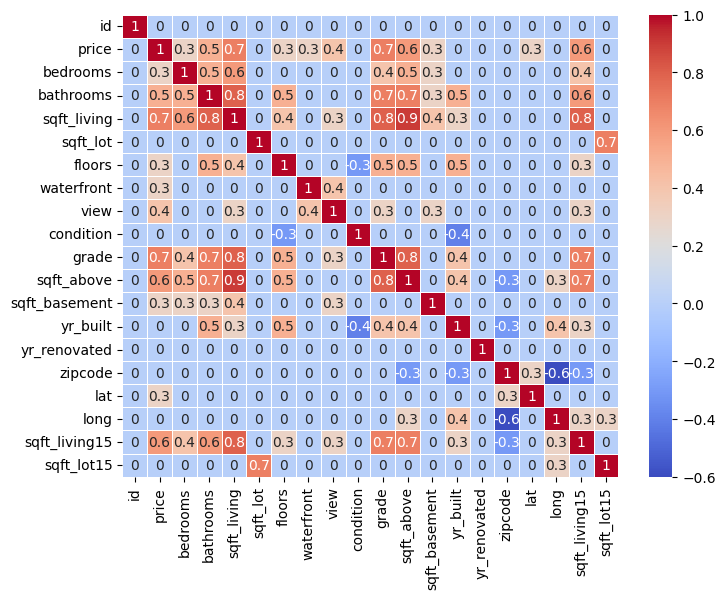

In [4]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm');

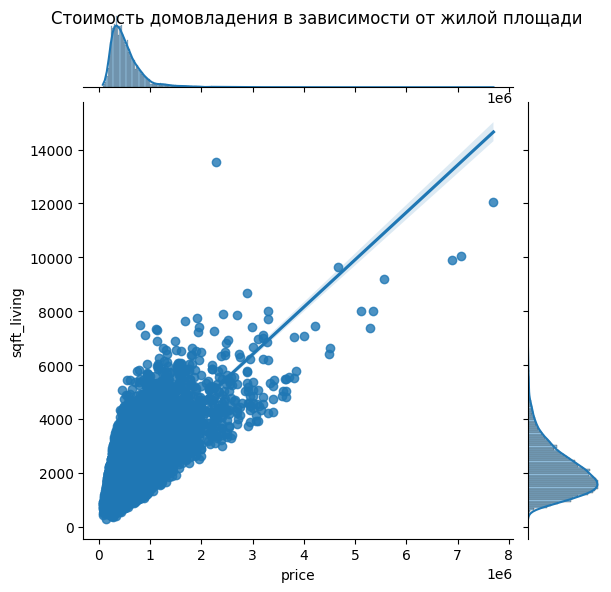

In [11]:
p = sns.jointplot(x=df['price'], y=df['sqft_living'], kind='reg');
p.fig.suptitle("Стоимость домовладения в зависимости от жилой площади");

Стоимость домовладения прямо пропорциональна его жилплощади.

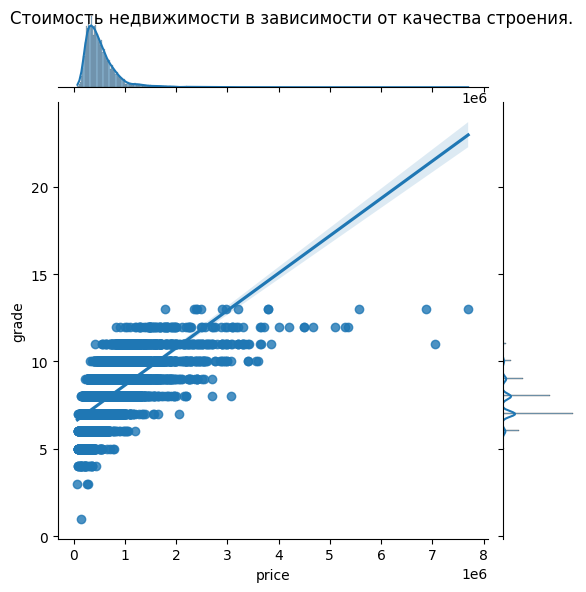

In [12]:
p = sns.jointplot(x=df['price'], y=df['grade'], kind='reg');
p.fig.suptitle("Стоимость недвижимости в зависимости от качества строения.");

Чем выше качество строения и дизайна дома, тем выше его стоимость.

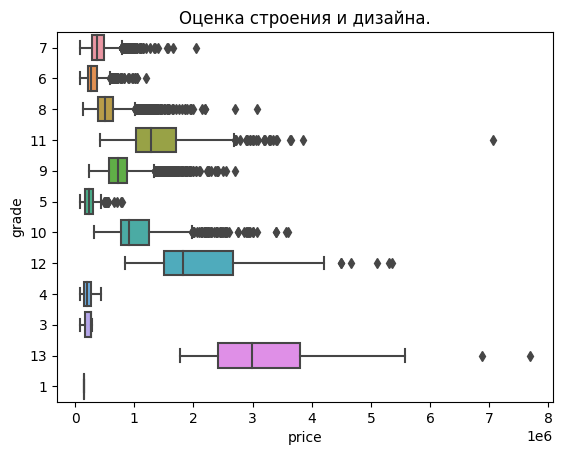

In [13]:
sns.boxplot(x=df['price'], y=df['grade'].astype('str'), whis=1.5);
plt.xlabel('price')
plt.ylabel('grade')
plt.title('Оценка строения и дизайна.');

Наибольшую стоимость имеют дома с оценкой строения и дизайна 13.

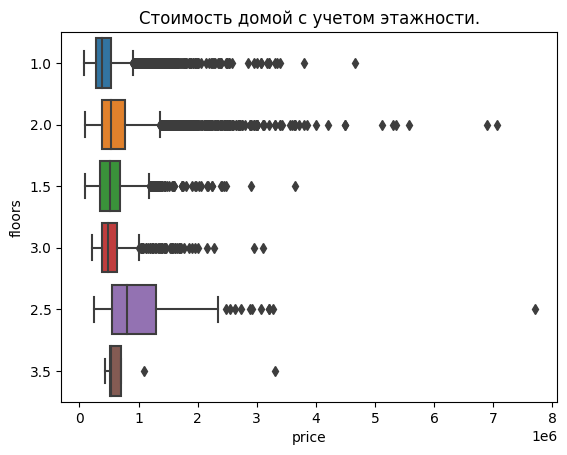

In [14]:
sns.boxplot(x=df['price'], y=df['floors'].astype('str'), whis=1.5);
plt.xlabel('price')
plt.ylabel('floors')
plt.title('Стоимость домой с учетом этажности.');

Наибольшую стоимость имеют дома с количеством этажей 2,5.

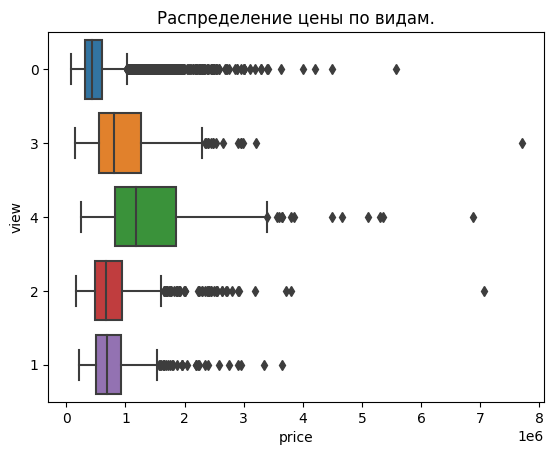

In [15]:
sns.boxplot(x=df['price'], y=df['view'].astype('str'), whis=1.5);
plt.xlabel('price')
plt.ylabel('view')
plt.title('Распределение цены по видам.');

Наибольшую стоимость имеют дома с оценкой вида 4.